# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# Type and size of data sets

print('Type of X_train: ' + str(type(X_train)))

print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_valid: ' + str(X_valid.shape))
print('y_valid: ' + str(y_valid.shape))
print('X_test: ' + str(X_test.shape))
print('y_test: ' + str(y_test.shape))

Type of X_train: <class 'numpy.ndarray'>
X_train: (34799, 32, 32, 3)
y_train: (34799,)
X_valid: (4410, 32, 32, 3)
y_valid: (4410,)
X_test: (12630, 32, 32, 3)
y_test: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

assert(X_train.shape[0] == y_train.shape[0])
assert(X_valid.shape[0] == y_valid.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[1:3]

n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

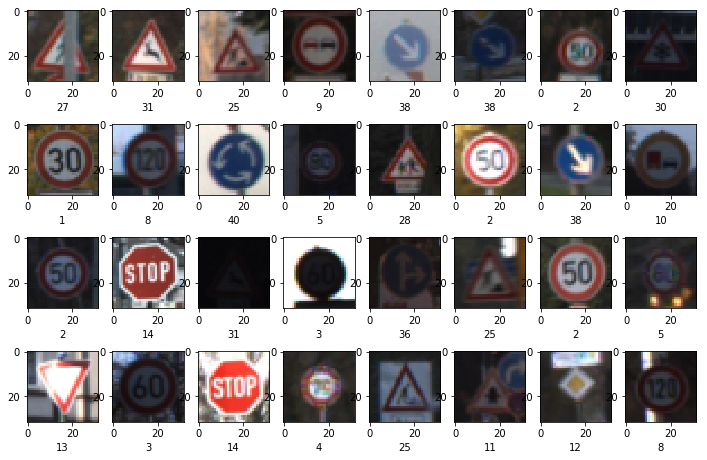

In [4]:
import random
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

plt.figure(1, figsize=(12, 8))
plotsize = [4, 8]
numplots = plotsize[0] * plotsize[1]

rand_indices = np.random.randint(0, len(X_train), numplots)

for i in range(len(rand_indices)):
    # take random sample    
    image = X_train[rand_indices[i]].squeeze()
    
    # plot the sample
    plt.subplot(plotsize[0], plotsize[1], i+1)
    plt.xlabel(y_train[rand_indices[i]])
    plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import matplotlib

# simple image normalization with rgb values
def img_normalize_rgb(img):
    min = img.min(axis=(1,2,3)).reshape(-1,1,1,1)
    max = img.max(axis=(1,2,3)).reshape(-1,1,1,1)
    
    img = (img - min) * 1.0 / (max - min)
    
    return img

# image normalization in hsv space
def img_normalize_hsv(imgs):
    imgs = imgs / 255
    pos_value = 2
    
    img_hsv = matplotlib.colors.rgb_to_hsv(imgs)
    
    img_hsv_min = img_hsv.min(axis=(1, 2))[:, pos_value]
    img_hsv_max = img_hsv.max(axis=(1, 2))[:, pos_value]
    img_hsv[:,:,:, 2] = (img_hsv[:,:,:, 2] - img_hsv_min.reshape(-1,1,1)) / (img_hsv_max - img_hsv_min).reshape(-1,1,1)
    
    return img_hsv

import cv2 

# image normalization using opencv with local contrast adjustment
def img_normalize(imgs):
    img_g = np.zeros(imgs.shape[0:3])
    for i in range(imgs.shape[0]):
        gray_image = cv2.cvtColor(imgs[i], cv2.COLOR_RGB2GRAY)
        #gray_image = cv2.equalizeHist(gray_image)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5,5))
        gray_image = clahe.apply(gray_image)
        img_g[i] = gray_image / 255.
    return img_g.reshape([imgs.shape[0], imgs.shape[1], imgs.shape[2], 1])

In [6]:
%%time

X_trainp = img_normalize(X_train)
X_validp = img_normalize(X_valid)
X_testp  = img_normalize(X_test)

print(X_trainp.shape)

size_colorspace = X_trainp.shape[3]

(34799, 32, 32, 1)
CPU times: user 3.88 s, sys: 2.4 s, total: 6.28 s
Wall time: 1.8 s


## Plot preprocessed images

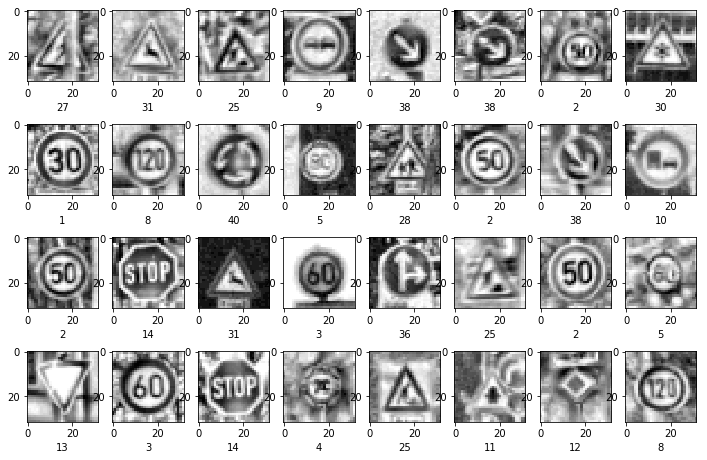

In [7]:
plt.figure(1, figsize=(12, 8))
plotsize = [4, 8]
numplots = plotsize[0] * plotsize[1]

# rand_indices from first plot with original images

for i in range(len(rand_indices)):
    # take random sample    
    image = X_trainp[rand_indices[i]].squeeze()
    
    # plot the sample
    plt.subplot(plotsize[0], plotsize[1], i+1)
    plt.xlabel(y_train[rand_indices[i]])
    plt.imshow(image, cmap='gray')

In [8]:
import scipy.ndimage
import cv2

USE_CV = True

def img_augmentation(imgs, rot_range=5., shift_range=5., zoom_range=0.1, noise_range=0.05):
    """
    Image augmentation with random
    1) Rotation
    2) Shift
    3) Zoom
    
    input: imgs, image batch as 4 dimensional np.array
    output: augmentated image batch
    """
    imgs_aug = np.zeros(imgs.shape)
    
    size = imgs.shape[1]
        
    for i in range(imgs.shape[0]):
        nr_aug_method = np.random.randint(0, 4)
        
        img = imgs[i].copy()
        
        if nr_aug_method == 0:
            # rotate
            rotation = rot_range * 2.0 * (random.random() - 0.5)
            
            img = scipy.ndimage.interpolation.rotate(img, rotation, reshape=False, mode='nearest', cval=0.4, order=1)
        elif nr_aug_method == 1:
            # shift
            shift_x = shift_range * 2.0 * (random.random() - 0.5)
            shift_y = shift_range * 2.0 * (random.random() - 0.5)
            
            img = scipy.ndimage.shift(img, [shift_x, shift_y, 0], order=1, mode='nearest', cval=0.4)
        elif nr_aug_method == 2:
            # zoom
            zoom = 1.0 + zoom_range * 2.0 * (random.random() - 0.5)
        
            if USE_CV:
                img = cv2.resize(img, None, fx=zoom, fy=zoom)
                delta = size - img.shape[0]

                if delta > 0:
                    img = np.pad(img, [(0, delta), (0, delta)], 'edge').reshape([size, size, 1])
                else:
                    img = img[:size, :size].reshape([size, size, 1])
            else:
                img = scipy.ndimage.zoom(img, zoom, order=1, mode='nearest', cval=0.4, prefilter=False)
                delta = size - img.shape[0]

                if delta > 0:
                    img = np.pad(img, [(0, delta), (0, delta)], 'edge').reshape([size, size, 1])
                else:
                    img = img[:size, :size].reshape([size, size, 1])
        elif nr_aug_method == 3:
                # noise
                img += np.random.normal(0, noise_range, img.shape)
                
        imgs_aug[i] = img

    return imgs_aug

## Plot preprocessed images with random augmentation

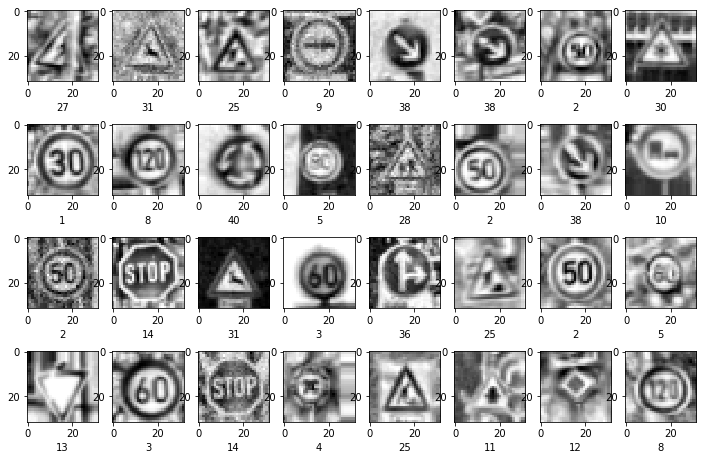

In [9]:
plt.figure(1, figsize=(12, 8))
plotsize = [4, 8]
numplots = plotsize[0] * plotsize[1]

# rand_indices from first plot with original images

aug_images = img_augmentation(X_trainp[rand_indices])

for i in range(len(rand_indices)):
    # take random sample    
    image = aug_images[i].squeeze()
    
    # plot the sample
    plt.subplot(plotsize[0], plotsize[1], i+1)
    plt.xlabel(y_train[rand_indices[i]])
    plt.imshow(image, cmap='gray')

### Model Architecture

In [10]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

# Keep probability of dropout
kpv = 0.7

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
from tensorflow.contrib.layers import flatten

def ImprovedLeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x128.
    F_W1 = tf.Variable(tf.truncated_normal((5, 5, 1, 128), mean=mu, stddev=sigma))
    F_b1 = tf.Variable(tf.zeros(128))
    layer_1 = tf.nn.conv2d(x, F_W1, [1, 1, 1, 1], 'VALID') + F_b1   
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    
    # Layer 2: Convolutional, Output 12x12x64
    F_W2 = tf.Variable(tf.truncated_normal((5, 5, 128, 64), mean=mu, stddev=sigma))
    F_b2 = tf.Variable(tf.zeros(64))
    layer_2 = tf.nn.conv2d(layer_1, F_W2, [1, 1, 1, 1], 'VALID') + F_b2   
    layer_2 = tf.nn.relu(layer_2)    
    layer_2 = tf.nn.max_pool(layer_2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    
    # Layer 3: Convolutional. Output = 5x5x16.
    F_W3 = tf.Variable(tf.truncated_normal((5, 5, 64, 32), mean=mu, stddev=sigma))
    F_b3 = tf.Variable(tf.zeros(32))
    layer_3 = tf.nn.conv2d(layer_3, F_W3, [1, 1, 1, 1], 'VALID') + F_b3
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.max_pool(layer_3, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # Flatten. Input = 5x5x16. Output = 512.
    layer_3 = tf.contrib.layers.flatten(layer_3)
    layer_3 = tf.nn.dropout(layer_3, keep_prob)
    
    # Layer 4: Fully Connected. Input = 512. Output = 120.
    F_W4 = tf.Variable(tf.truncated_normal((512, 120), mean=mu, stddev=sigma))
    F_b4 = tf.Variable(tf.zeros(120))
    
    layer_4 = tf.matmul(layer_3, F_W4)
    layer_4 = layer_4  + F_b4
    layer_4 = tf.nn.relu(layer_4)
    layer_4 = tf.nn.dropout(layer_4, keep_prob)
    
    # Layer 5: Fully Connected. Input = 120. Output = 84.
    F_W5 = tf.Variable(tf.truncated_normal((120, 84), mean=mu, stddev=sigma))
    F_b5 = tf.Variable(tf.zeros(84))

    layer_5 = tf.matmul(layer_4, F_W5) + F_b5
    layer_5 = tf.nn.relu(layer_5)

    # Layer 6: Fully Connected. Input = 84. Output = 10.
    F_W6 = tf.Variable(tf.truncated_normal((84, n_classes), mean=mu, stddev=sigma))
    F_b6 = tf.Variable(tf.zeros(n_classes))

    layer_6 = tf.matmul(layer_5, F_W6) + F_b6
    
    logits = layer_6
    
    return logits

In [12]:
from tensorflow.contrib.layers import flatten

def TwoStageConvnet(x):
    """
    Two stage convnet like descibed in 'Traffic Sign Recognition with Multi-Scale Convolutional Networks'
    from Pierre Sermanet and Yann LeCun
    
    Two convolutional stages with subsampling, classifier connected to first and second stage
    
    """
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    num_colors = 1
    
    # Stage 1:
    # Convolutional. Input = 32x32xnum_colors. Output = 28x28x108
    F_W1 = tf.Variable(tf.truncated_normal((5, 5, num_colors, 108), mean=mu, stddev=sigma))
    F_b1 = tf.Variable(tf.zeros(108))
    layer_1 = tf.nn.conv2d(x, F_W1, [1, 1, 1, 1], 'VALID') + F_b1
    layer_1 = tf.nn.relu(layer_1)
    
    # Subsampling. Input = 28x28x108. Output = 14x14x108.
    layer_1 = tf.nn.max_pool(layer_1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    
    # Stage 2
    # Input 14x14x108, Output 10x10x200
    F_W2 = tf.Variable(tf.truncated_normal((5, 5, 108, 200), mean=mu, stddev=sigma))
    F_b2 = tf.Variable(tf.zeros(200))
    layer_2 = tf.nn.conv2d(layer_1, F_W2, [1, 1, 1, 1], 'VALID') + F_b2
    layer_2 = tf.nn.relu(layer_2)
    
    # Subsampling. Input = 10x10x200. Output = 5x5x200.
    layer_2 = tf.nn.max_pool(layer_2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    
    # Subsampling of layer 1. Input = 14x14x108. Output = 7x7x108.
    layer_1_s2 = tf.nn.max_pool(layer_1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # Flatten. Input = 5x5x200 + 7x7x108. Output = 10292.
    conv_layer_out1 = tf.contrib.layers.flatten(layer_1_s2)
    conv_layer_out2 = tf.contrib.layers.flatten(layer_2)
    conv_layer_out = tf.concat([conv_layer_out1, conv_layer_out2], axis=1)
    #conv_layer_out = tf.nn.dropout(conv_layer_out, keep_prob)
    
    # Classifier: 2 fully connected layer
    F_W3 = tf.Variable(tf.truncated_normal((10292, 100), mean=mu, stddev=sigma))
    F_b3 = tf.Variable(tf.zeros(100))
    
    layer_3 = tf.matmul(conv_layer_out, F_W3)
    layer_3 = layer_3  + F_b3
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.dropout(layer_3, keep_prob)
    
    
    F_W4 = tf.Variable(tf.truncated_normal((100, 43), mean=mu, stddev=sigma))
    F_b4 = tf.Variable(tf.zeros(43))

    logits = tf.matmul(layer_3, F_W4) + F_b4
        
    return logits

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
starter_learning_rate = 0.0005

logits = TwoStageConvnet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

global_step = tf.Variable(0, trainable=False)

# learning rate: exponentially decaying
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           5.0, 0.95)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

Training...

EPOCH 1 ...
Train Accuracy = 0.216
Validation Accuracy = 0.204
Learning rate = 0.00050
EPOCH 2 ...
Train Accuracy = 0.676
Validation Accuracy = 0.644
Learning rate = 0.00049
EPOCH 3 ...
Train Accuracy = 0.883
Validation Accuracy = 0.823
Learning rate = 0.00049
EPOCH 4 ...
Train Accuracy = 0.940
Validation Accuracy = 0.883
Learning rate = 0.00048
EPOCH 5 ...
Train Accuracy = 0.962
Validation Accuracy = 0.910
Learning rate = 0.00048
EPOCH 6 ...
Train Accuracy = 0.976
Validation Accuracy = 0.930
Learning rate = 0.00047
EPOCH 7 ...
Train Accuracy = 0.984
Validation Accuracy = 0.957
Learning rate = 0.00047


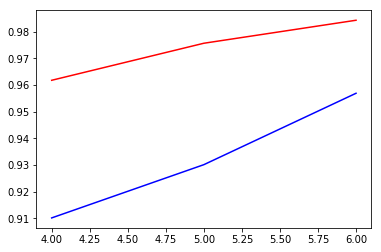

EPOCH 8 ...
Train Accuracy = 0.990
Validation Accuracy = 0.966
Learning rate = 0.00047


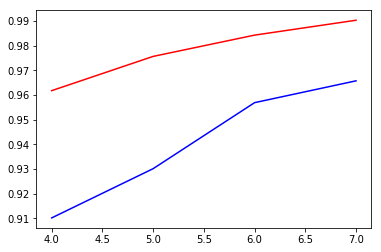

EPOCH 9 ...
Train Accuracy = 0.993
Validation Accuracy = 0.973
Learning rate = 0.00046


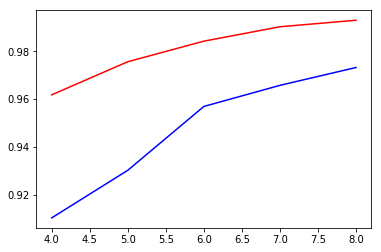

EPOCH 10 ...
Train Accuracy = 0.994
Validation Accuracy = 0.969
Learning rate = 0.00046


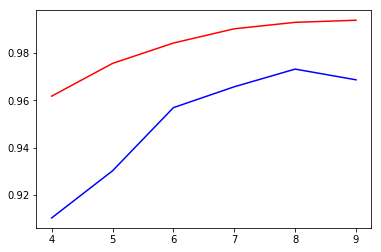

EPOCH 11 ...
Train Accuracy = 0.995
Validation Accuracy = 0.978
Learning rate = 0.00045


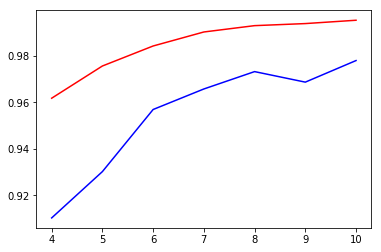

EPOCH 12 ...
Train Accuracy = 0.996
Validation Accuracy = 0.977
Learning rate = 0.00045


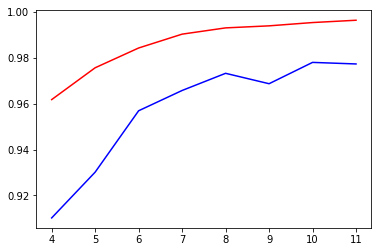

EPOCH 13 ...
Train Accuracy = 0.997
Validation Accuracy = 0.981
Learning rate = 0.00044


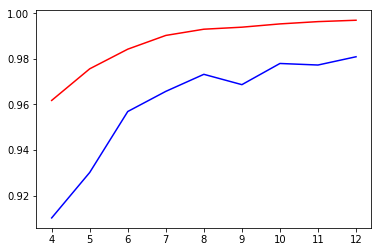

EPOCH 14 ...
Train Accuracy = 0.997
Validation Accuracy = 0.983
Learning rate = 0.00044


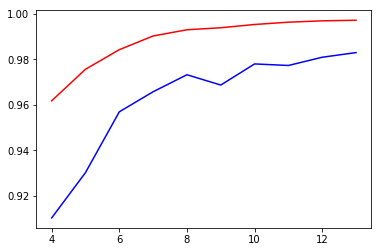

EPOCH 15 ...
Train Accuracy = 0.997
Validation Accuracy = 0.979
Learning rate = 0.00043


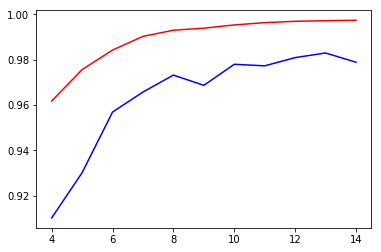

EPOCH 16 ...
Train Accuracy = 0.998
Validation Accuracy = 0.983
Learning rate = 0.00043


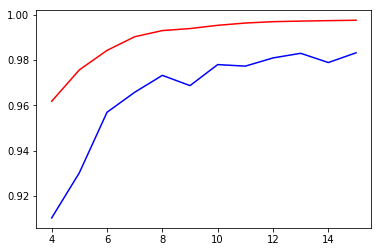

EPOCH 17 ...
Train Accuracy = 0.998
Validation Accuracy = 0.985
Learning rate = 0.00042


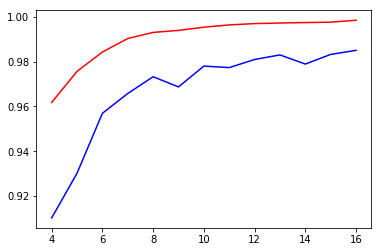

EPOCH 18 ...
Train Accuracy = 0.998
Validation Accuracy = 0.986
Learning rate = 0.00042


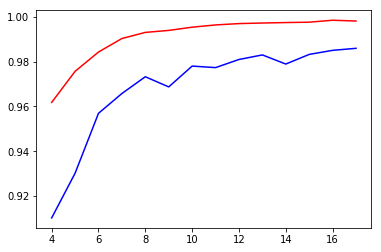

EPOCH 19 ...
Train Accuracy = 0.998
Validation Accuracy = 0.982
Learning rate = 0.00042


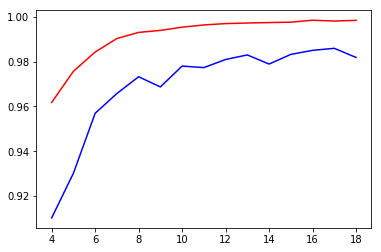

EPOCH 20 ...
Train Accuracy = 0.999
Validation Accuracy = 0.991
Learning rate = 0.00041


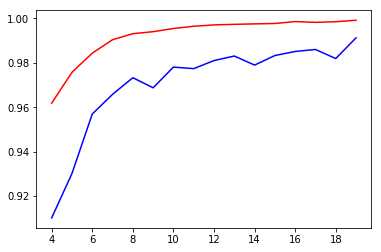

EPOCH 21 ...
Train Accuracy = 0.999
Validation Accuracy = 0.987
Learning rate = 0.00041


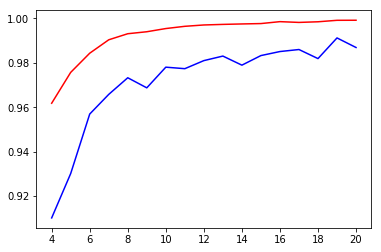

EPOCH 22 ...
Train Accuracy = 0.999
Validation Accuracy = 0.983
Learning rate = 0.00040


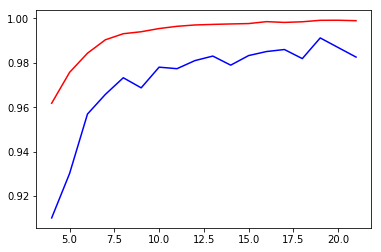

EPOCH 23 ...
Train Accuracy = 0.999
Validation Accuracy = 0.987
Learning rate = 0.00040


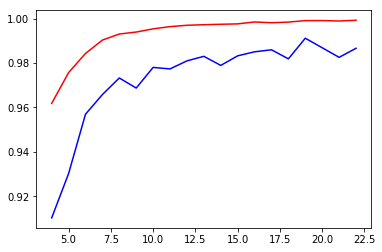

EPOCH 24 ...
Train Accuracy = 0.999
Validation Accuracy = 0.985
Learning rate = 0.00039


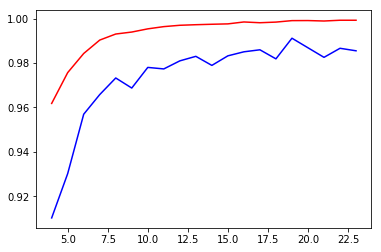

EPOCH 25 ...
Train Accuracy = 0.999
Validation Accuracy = 0.985
Learning rate = 0.00039


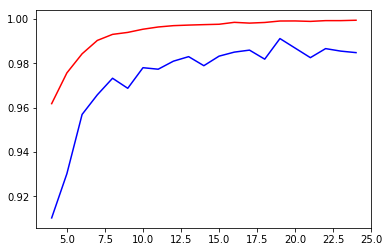

EPOCH 26 ...
Train Accuracy = 1.000
Validation Accuracy = 0.986
Learning rate = 0.00039


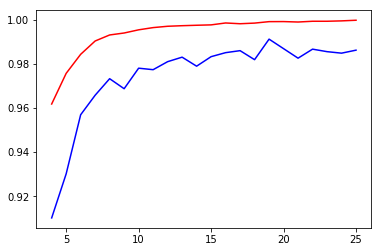

EPOCH 27 ...
Train Accuracy = 0.999
Validation Accuracy = 0.984
Learning rate = 0.00038


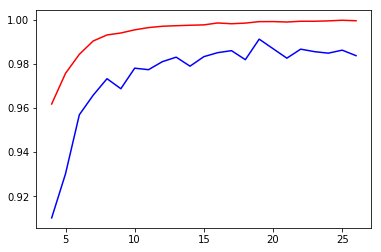

EPOCH 28 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00038


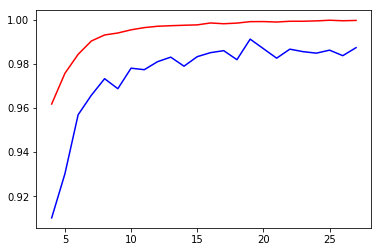

EPOCH 29 ...
Train Accuracy = 1.000
Validation Accuracy = 0.984
Learning rate = 0.00038


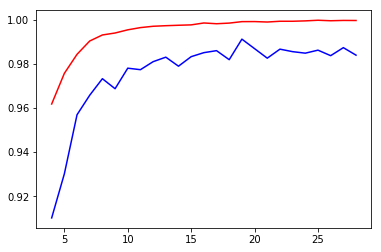

EPOCH 30 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00037


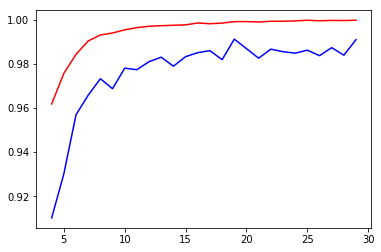

EPOCH 31 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00037


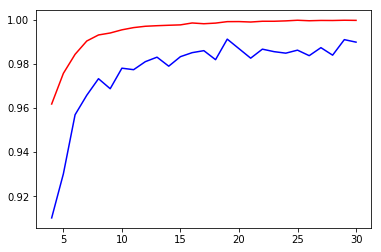

EPOCH 32 ...
Train Accuracy = 1.000
Validation Accuracy = 0.981
Learning rate = 0.00036


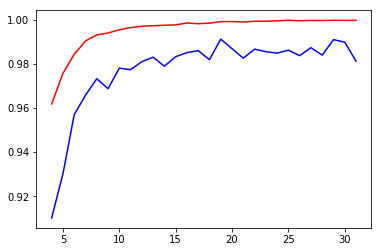

EPOCH 33 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00036


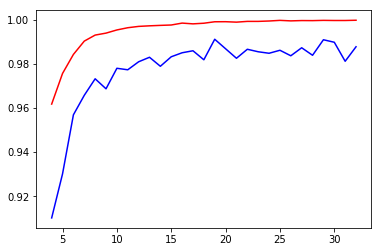

EPOCH 34 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00036


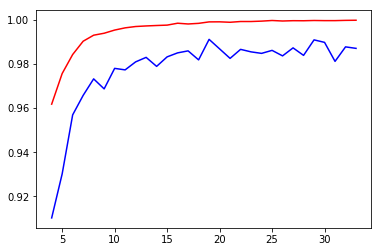

EPOCH 35 ...
Train Accuracy = 1.000
Validation Accuracy = 0.986
Learning rate = 0.00035


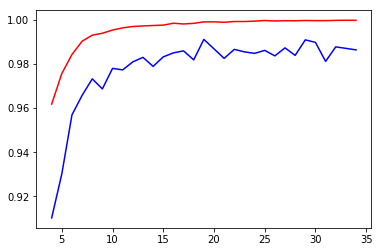

EPOCH 36 ...
Train Accuracy = 1.000
Validation Accuracy = 0.986
Learning rate = 0.00035


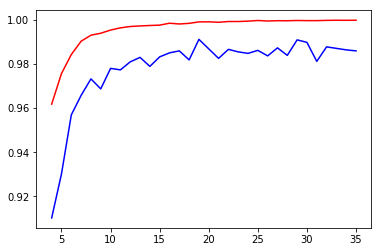

EPOCH 37 ...
Train Accuracy = 1.000
Validation Accuracy = 0.980
Learning rate = 0.00035


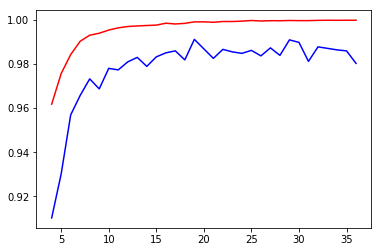

EPOCH 38 ...
Train Accuracy = 1.000
Validation Accuracy = 0.978
Learning rate = 0.00034


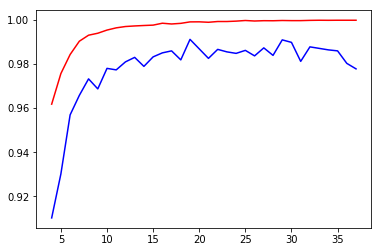

EPOCH 39 ...
Train Accuracy = 1.000
Validation Accuracy = 0.981
Learning rate = 0.00034


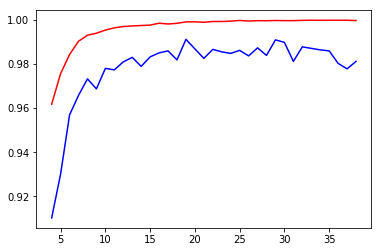

EPOCH 40 ...
Train Accuracy = 1.000
Validation Accuracy = 0.983
Learning rate = 0.00034


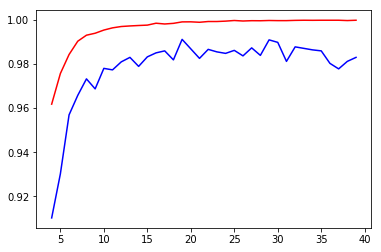

EPOCH 41 ...
Train Accuracy = 1.000
Validation Accuracy = 0.981
Learning rate = 0.00033


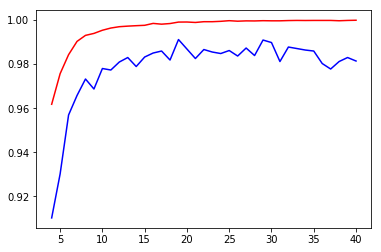

EPOCH 42 ...
Train Accuracy = 1.000
Validation Accuracy = 0.984
Learning rate = 0.00033


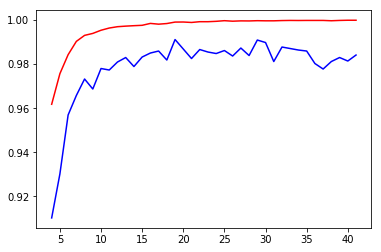

EPOCH 43 ...
Train Accuracy = 1.000
Validation Accuracy = 0.985
Learning rate = 0.00032


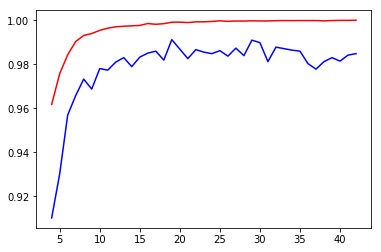

EPOCH 44 ...
Train Accuracy = 1.000
Validation Accuracy = 0.986
Learning rate = 0.00032


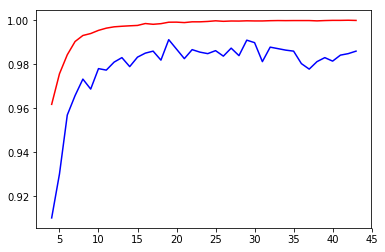

EPOCH 45 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00032


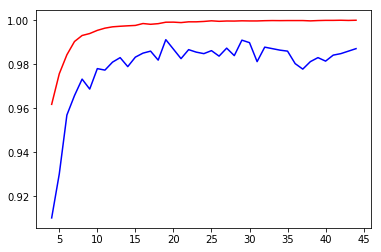

EPOCH 46 ...
Train Accuracy = 1.000
Validation Accuracy = 0.985
Learning rate = 0.00032


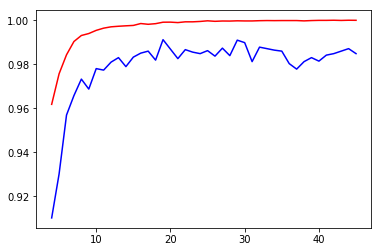

EPOCH 47 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00031


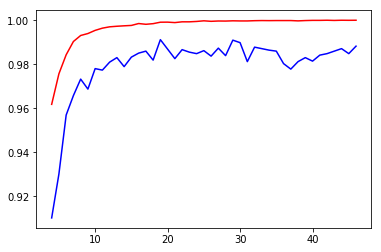

EPOCH 48 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00031


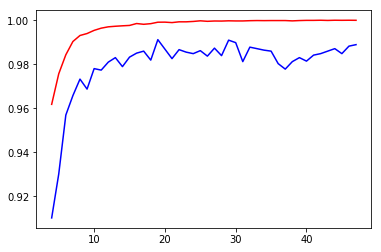

EPOCH 49 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00031


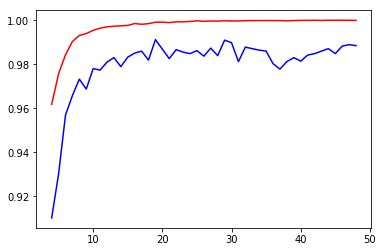

EPOCH 50 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00030


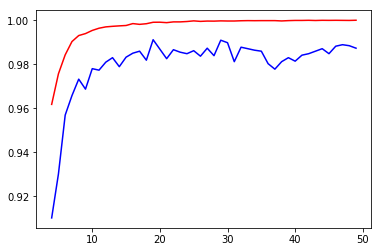

EPOCH 51 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00030


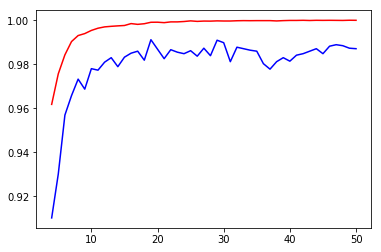

EPOCH 52 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00030


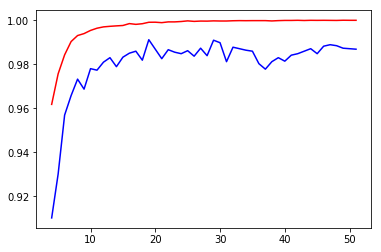

EPOCH 53 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00029


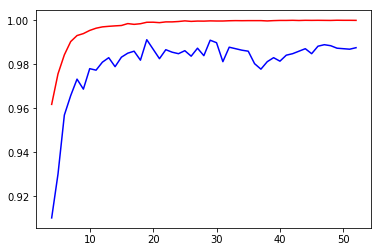

EPOCH 54 ...
Train Accuracy = 1.000
Validation Accuracy = 0.986
Learning rate = 0.00029


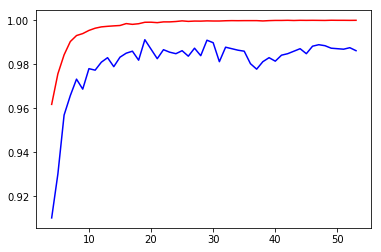

EPOCH 55 ...
Train Accuracy = 1.000
Validation Accuracy = 0.986
Learning rate = 0.00029


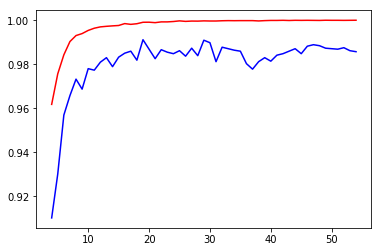

EPOCH 56 ...
Train Accuracy = 1.000
Validation Accuracy = 0.985
Learning rate = 0.00028


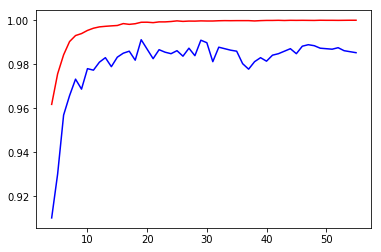

EPOCH 57 ...
Train Accuracy = 1.000
Validation Accuracy = 0.984
Learning rate = 0.00028


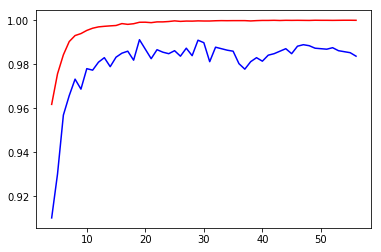

EPOCH 58 ...
Train Accuracy = 1.000
Validation Accuracy = 0.986
Learning rate = 0.00028


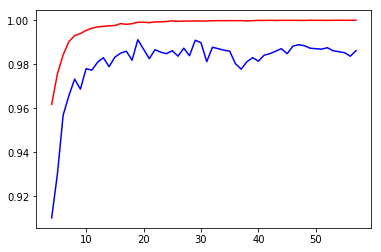

EPOCH 59 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00028


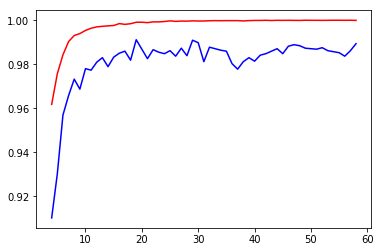

EPOCH 60 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00027


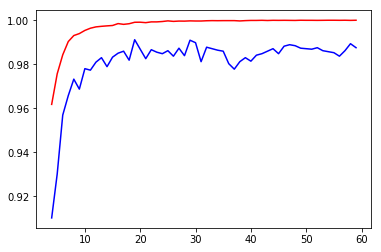

EPOCH 61 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00027


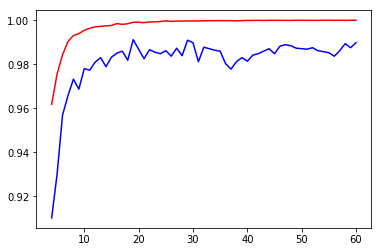

EPOCH 62 ...
Train Accuracy = 1.000
Validation Accuracy = 0.984
Learning rate = 0.00027


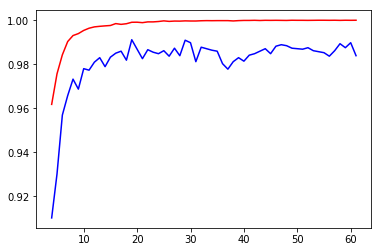

EPOCH 63 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00026


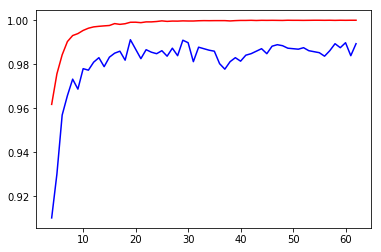

EPOCH 64 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00026


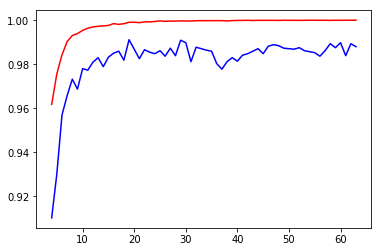

EPOCH 65 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00026


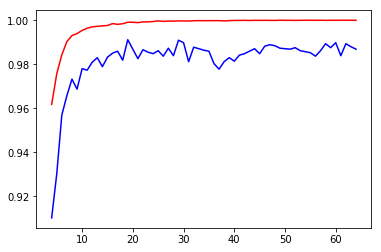

EPOCH 66 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00026


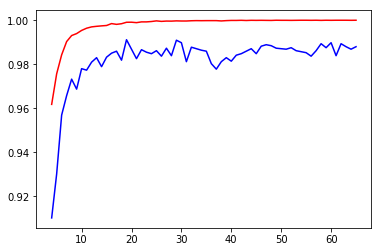

EPOCH 67 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00025


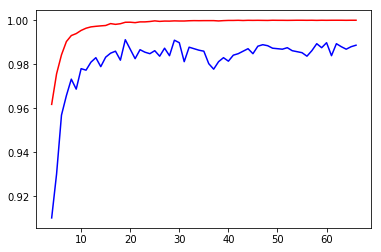

EPOCH 68 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00025


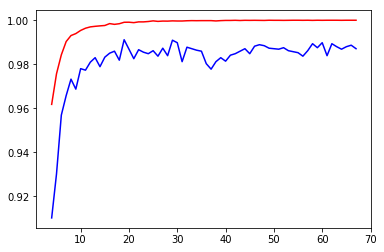

EPOCH 69 ...
Train Accuracy = 1.000
Validation Accuracy = 0.985
Learning rate = 0.00025


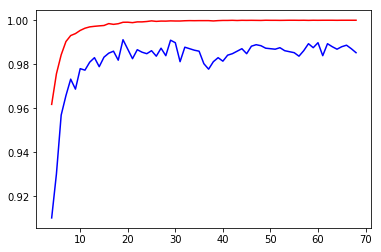

EPOCH 70 ...
Train Accuracy = 1.000
Validation Accuracy = 0.985
Learning rate = 0.00025


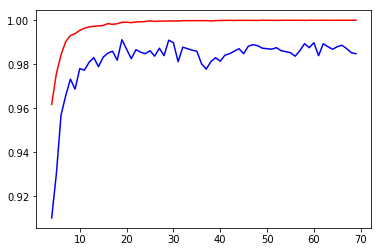

EPOCH 71 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00024


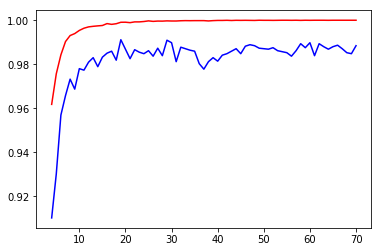

EPOCH 72 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00024


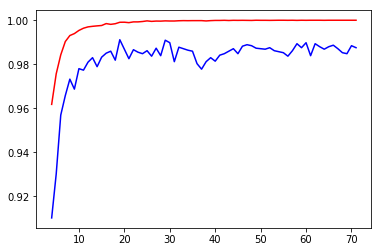

EPOCH 73 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00024


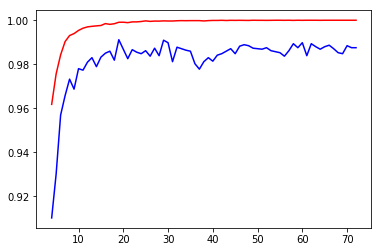

EPOCH 74 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00024


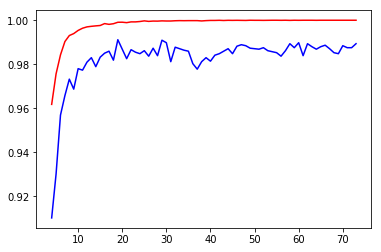

EPOCH 75 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00023


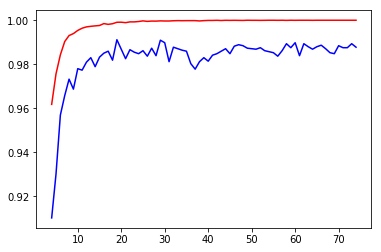

EPOCH 76 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00023


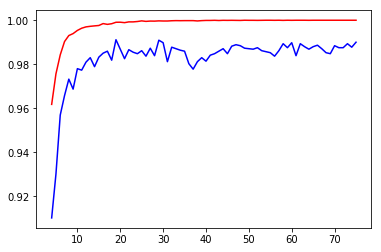

EPOCH 77 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00023


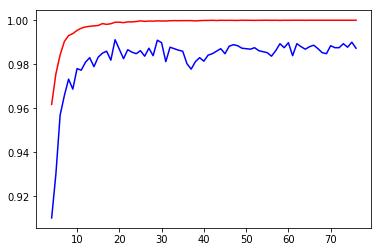

EPOCH 78 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00023


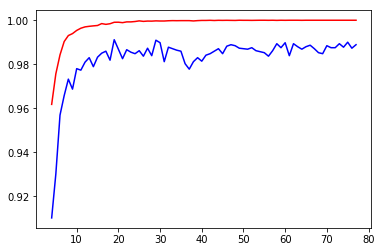

EPOCH 79 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00022


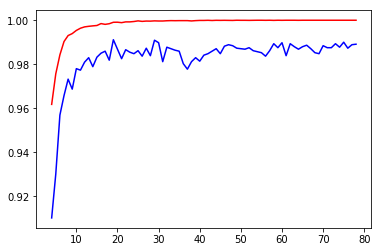

EPOCH 80 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00022


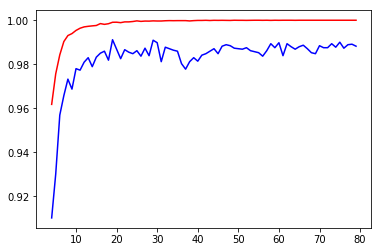

EPOCH 81 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00022


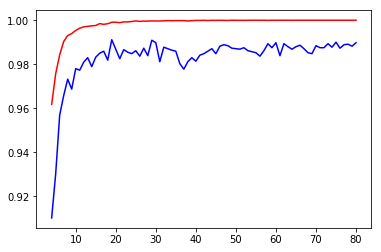

EPOCH 82 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00022


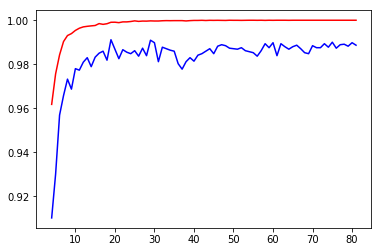

EPOCH 83 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00022


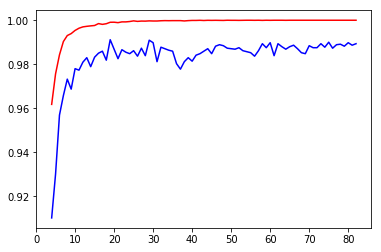

EPOCH 84 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00021


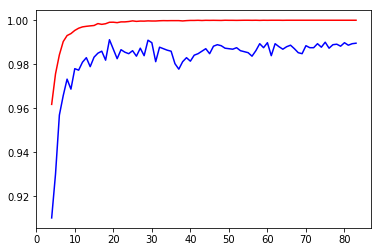

EPOCH 85 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00021


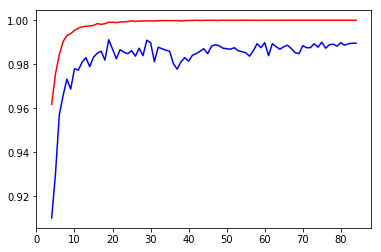

EPOCH 86 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00021


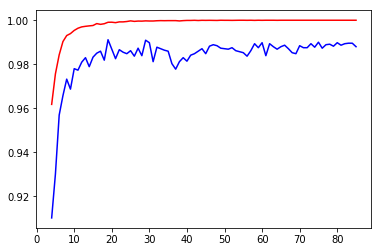

EPOCH 87 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00021


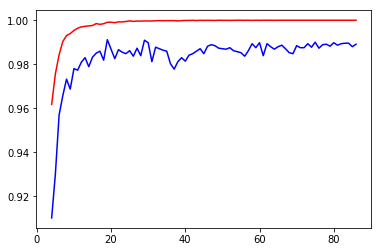

EPOCH 88 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00020


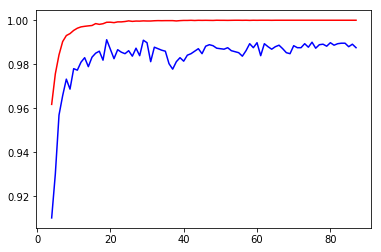

EPOCH 89 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00020


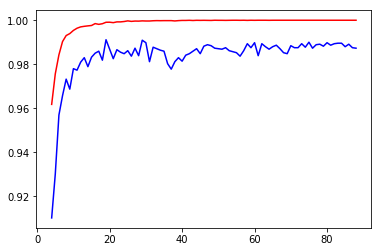

EPOCH 90 ...
Train Accuracy = 1.000
Validation Accuracy = 0.984
Learning rate = 0.00020


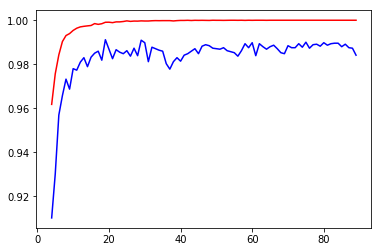

EPOCH 91 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00020


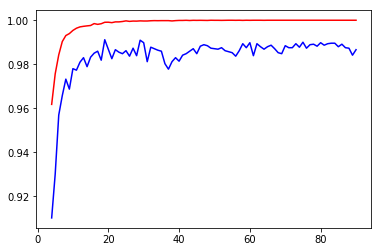

EPOCH 92 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00020


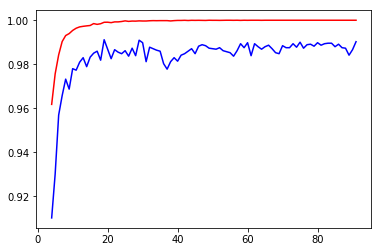

EPOCH 93 ...
Train Accuracy = 1.000
Validation Accuracy = 0.985
Learning rate = 0.00019


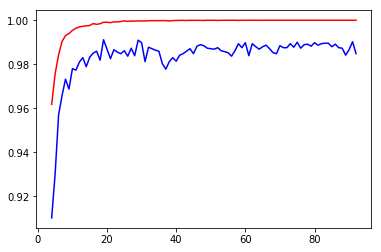

EPOCH 94 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00019


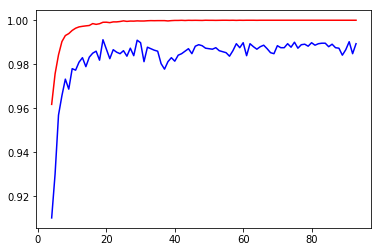

EPOCH 95 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00019


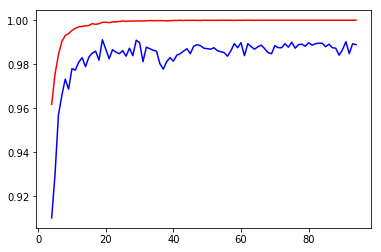

EPOCH 96 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00019


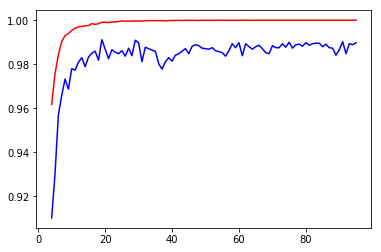

EPOCH 97 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00019


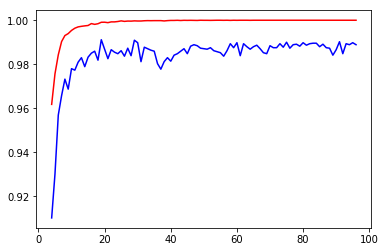

EPOCH 98 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00018


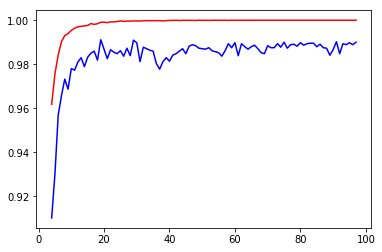

EPOCH 99 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00018


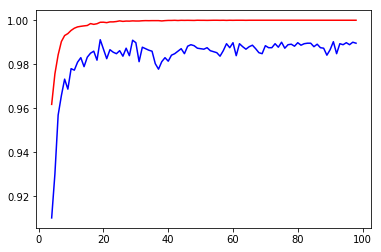

EPOCH 100 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00018


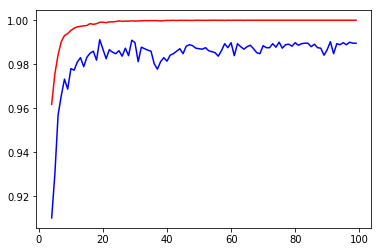

EPOCH 101 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00018


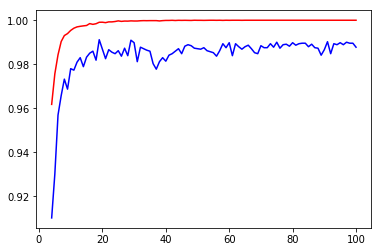

EPOCH 102 ...
Train Accuracy = 1.000
Validation Accuracy = 0.983
Learning rate = 0.00018


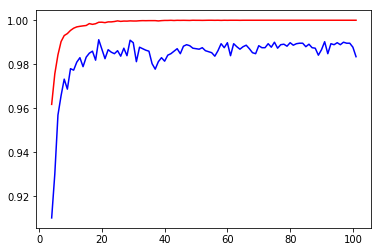

EPOCH 103 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00018


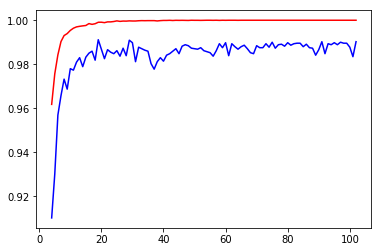

EPOCH 104 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00017


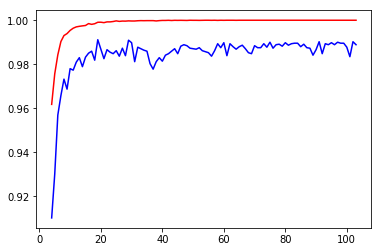

EPOCH 105 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00017


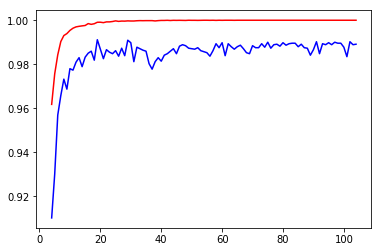

EPOCH 106 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00017


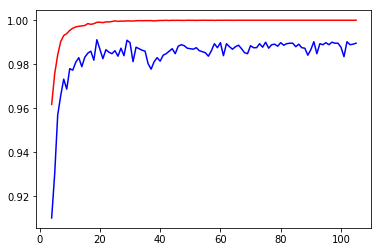

EPOCH 107 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00017


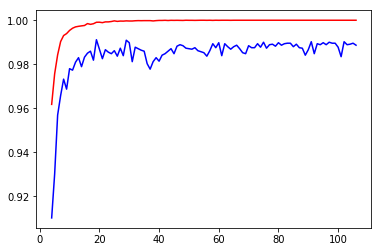

EPOCH 108 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00017


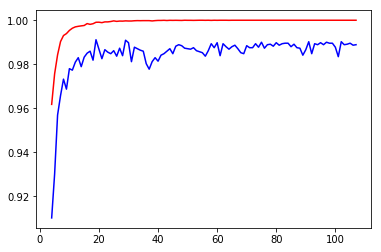

EPOCH 109 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00017


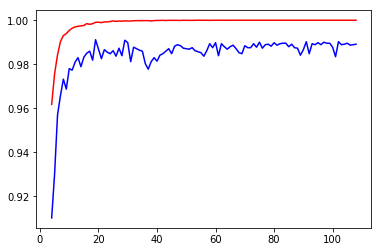

EPOCH 110 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00016


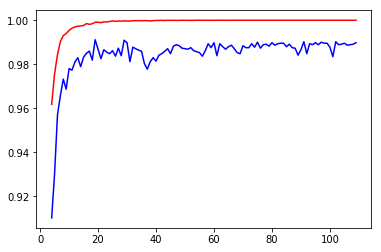

EPOCH 111 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00016


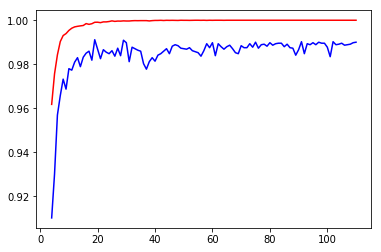

EPOCH 112 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00016


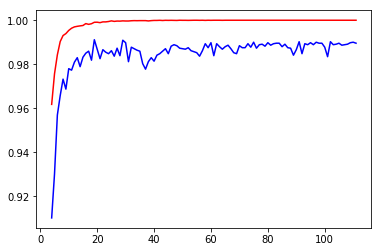

EPOCH 113 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00016


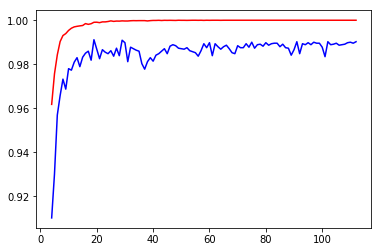

EPOCH 114 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00016


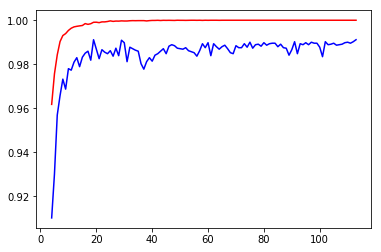

EPOCH 115 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00016


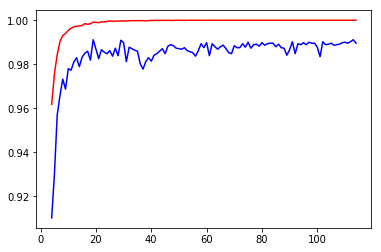

EPOCH 116 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00015


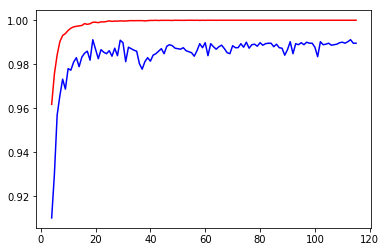

EPOCH 117 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00015


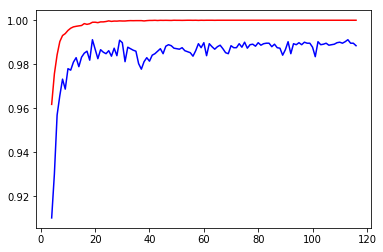

EPOCH 118 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00015


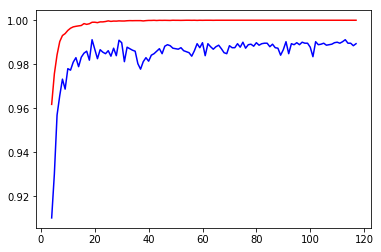

EPOCH 119 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00015


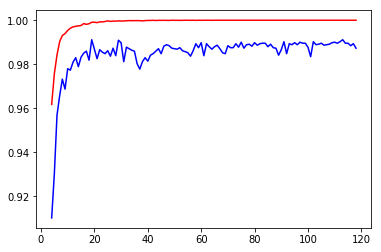

EPOCH 120 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00015


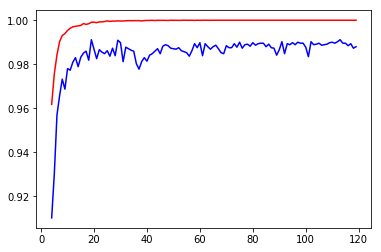

EPOCH 121 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00015


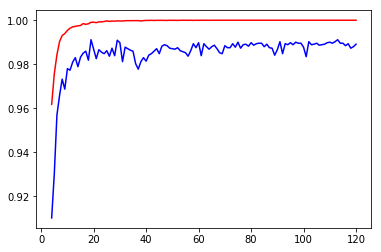

EPOCH 122 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00014


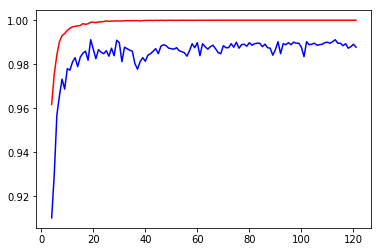

EPOCH 123 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00014


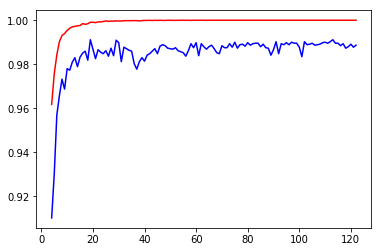

EPOCH 124 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00014


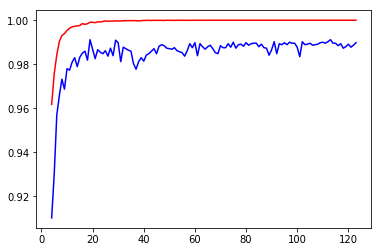

EPOCH 125 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00014


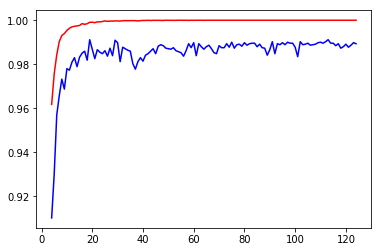

EPOCH 126 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00014


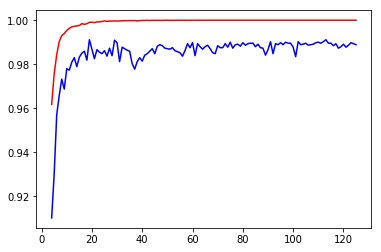

EPOCH 127 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00014


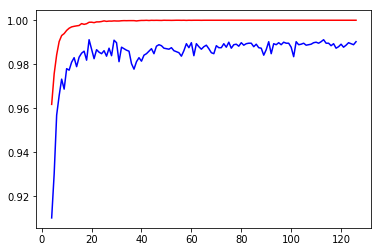

EPOCH 128 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00014


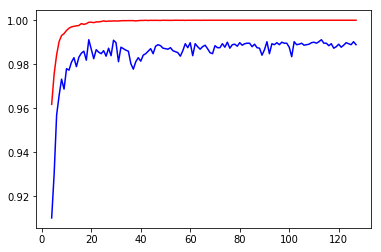

EPOCH 129 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00013


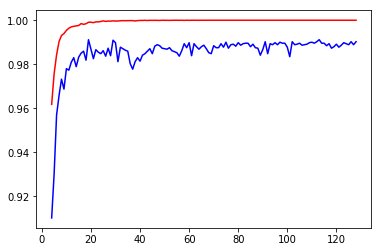

EPOCH 130 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00013


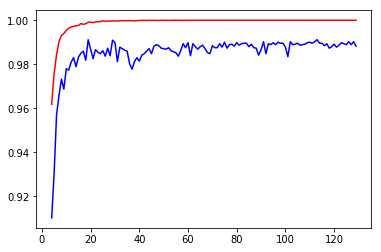

EPOCH 131 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00013


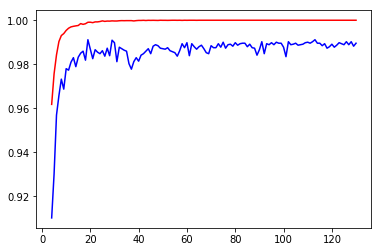

EPOCH 132 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00013


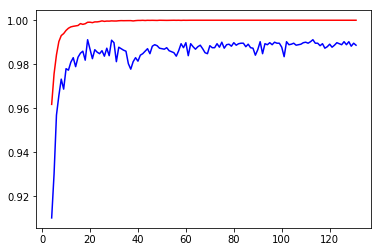

EPOCH 133 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00013


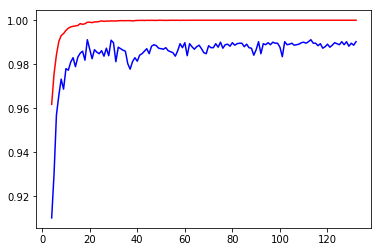

EPOCH 134 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00013


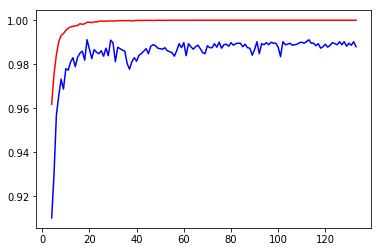

EPOCH 135 ...
Train Accuracy = 1.000
Validation Accuracy = 0.992
Learning rate = 0.00013


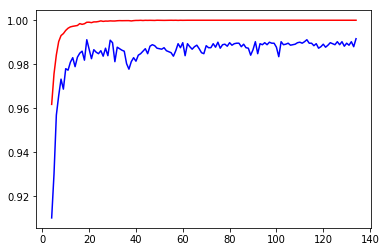

EPOCH 136 ...
Train Accuracy = 1.000
Validation Accuracy = 0.993
Learning rate = 0.00013


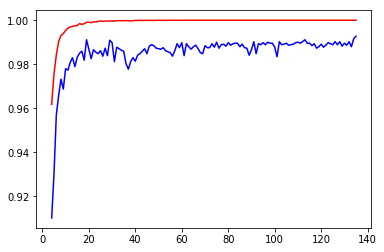

EPOCH 137 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00012


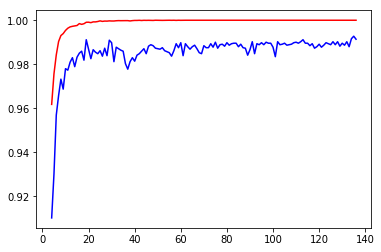

EPOCH 138 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00012


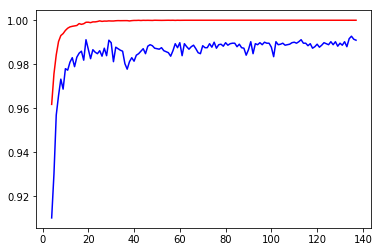

EPOCH 139 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00012


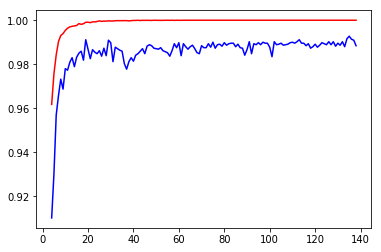

EPOCH 140 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00012


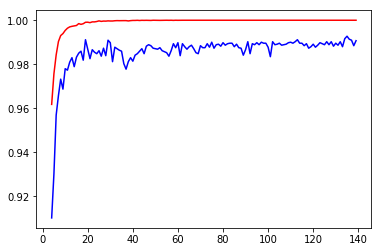

EPOCH 141 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00012


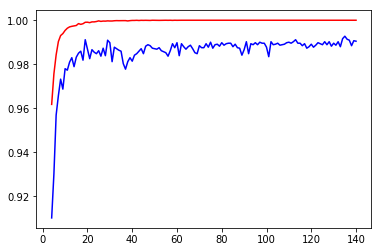

EPOCH 142 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00012


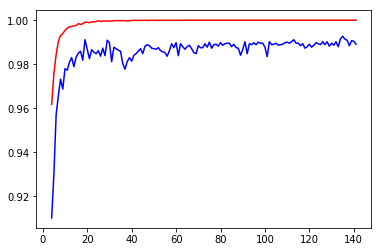

EPOCH 143 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00012


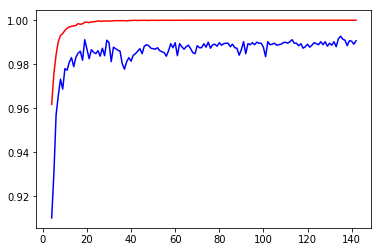

EPOCH 144 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00012


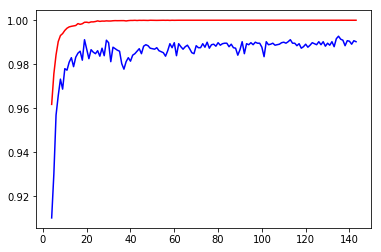

EPOCH 145 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00011


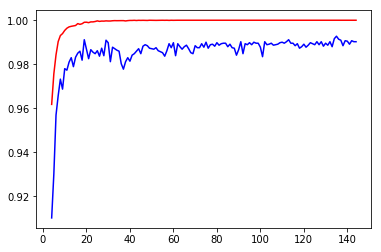

EPOCH 146 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00011


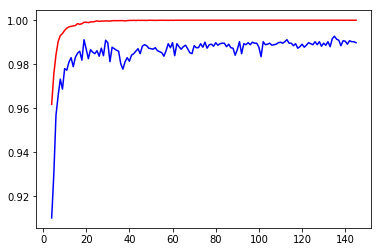

EPOCH 147 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00011


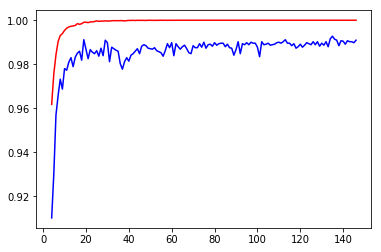

EPOCH 148 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00011


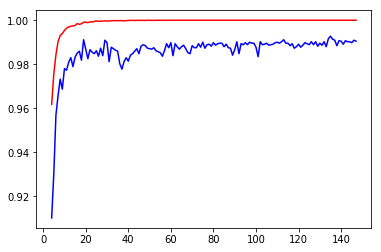

EPOCH 149 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00011


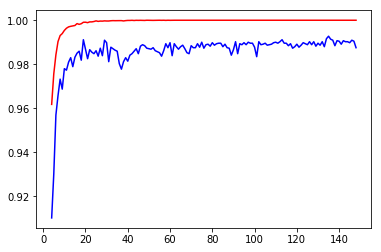

EPOCH 150 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00011


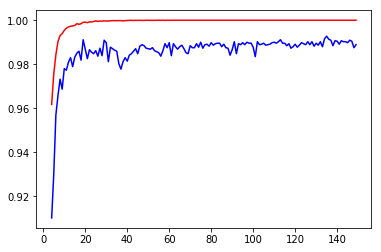

EPOCH 151 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00011


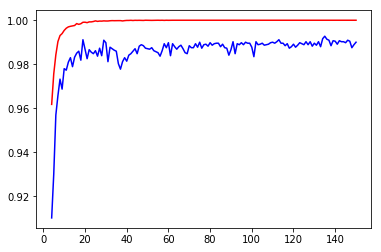

EPOCH 152 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00011


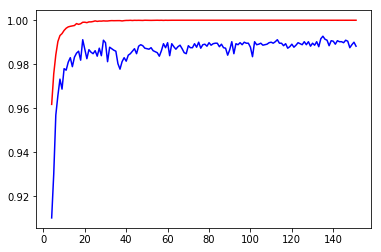

EPOCH 153 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00011


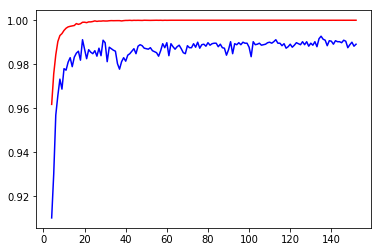

EPOCH 154 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00010


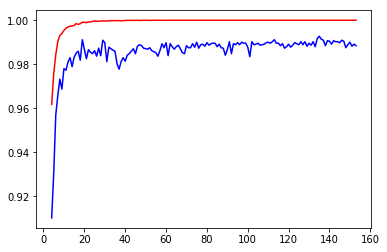

EPOCH 155 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00010


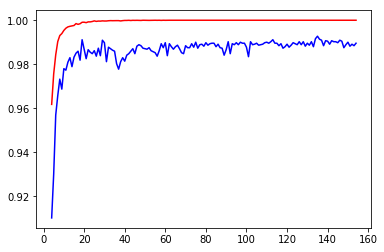

EPOCH 156 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00010


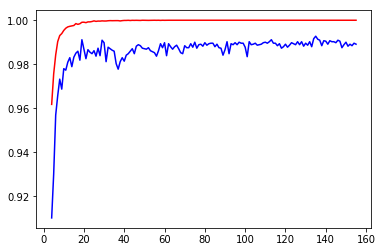

EPOCH 157 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00010


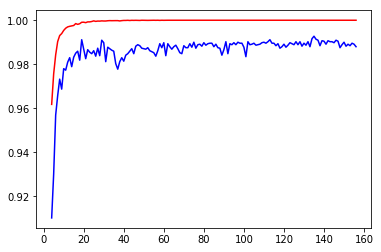

EPOCH 158 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00010


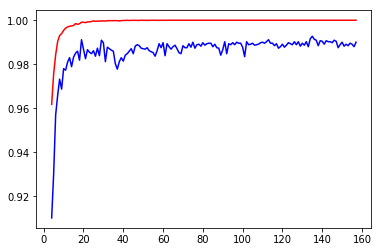

EPOCH 159 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00010


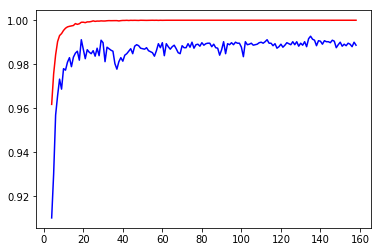

EPOCH 160 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00010


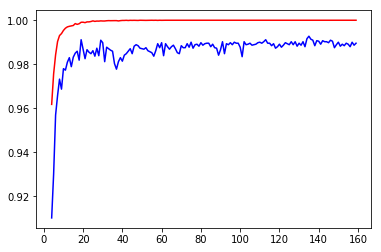

EPOCH 161 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00010


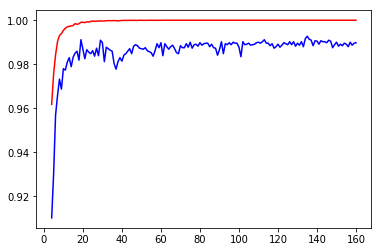

EPOCH 162 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00010


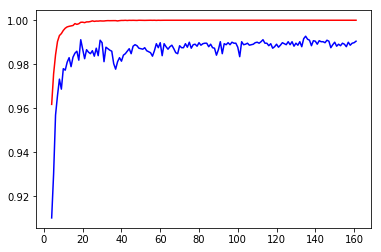

EPOCH 163 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00009


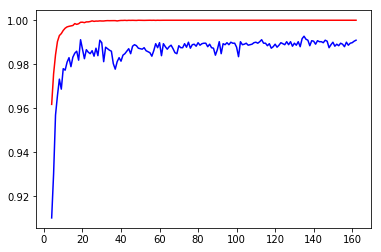

EPOCH 164 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00009


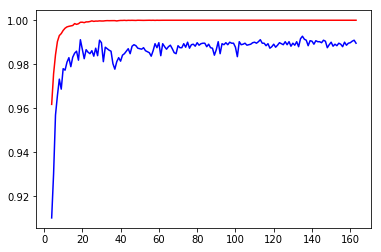

EPOCH 165 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00009


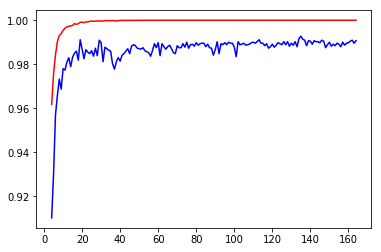

EPOCH 166 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00009


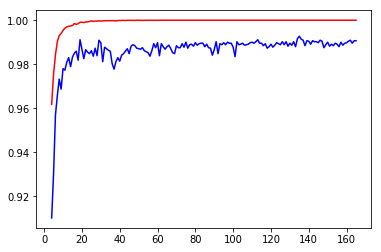

EPOCH 167 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00009


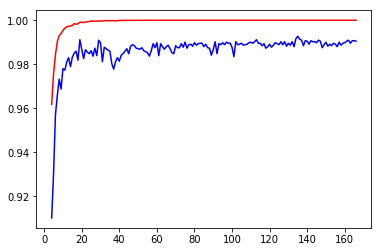

EPOCH 168 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00009


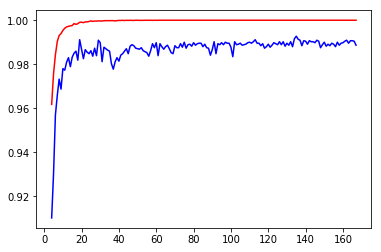

EPOCH 169 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00009


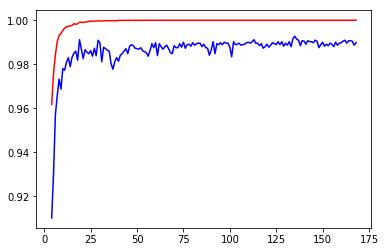

EPOCH 170 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00009


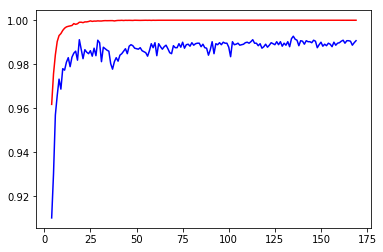

EPOCH 171 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00009


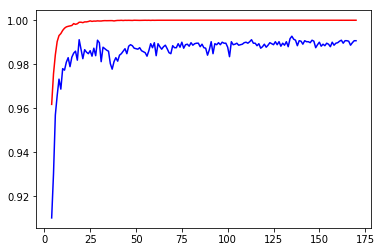

EPOCH 172 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00009


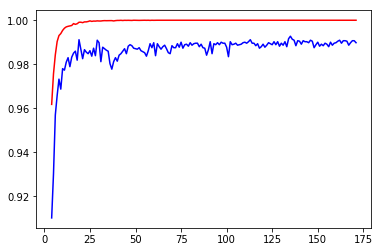

EPOCH 173 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00009


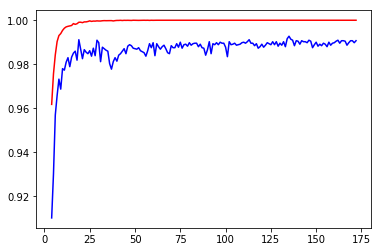

EPOCH 174 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00008


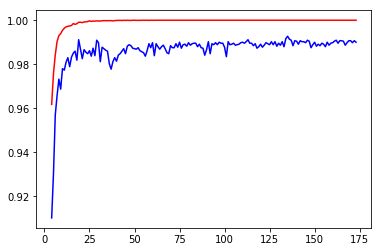

EPOCH 175 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00008


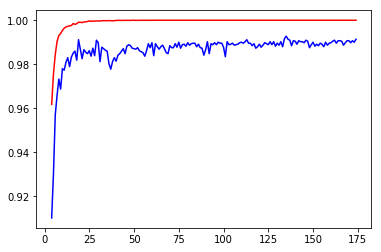

EPOCH 176 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00008


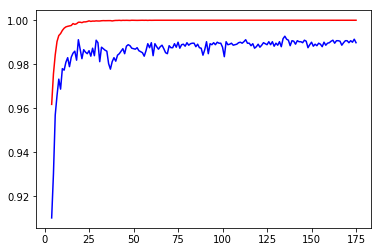

EPOCH 177 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00008


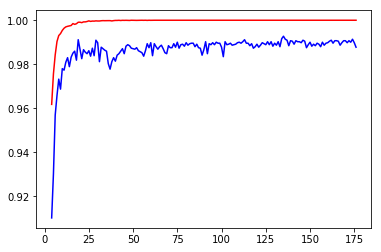

EPOCH 178 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00008


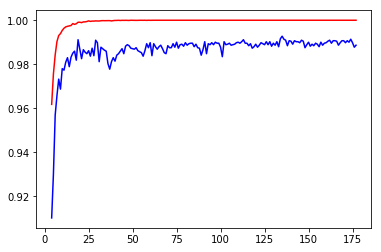

EPOCH 179 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00008


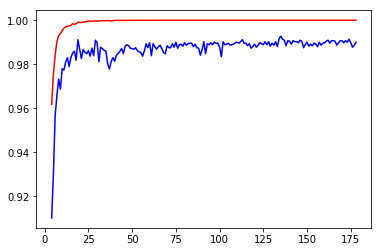

EPOCH 180 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00008


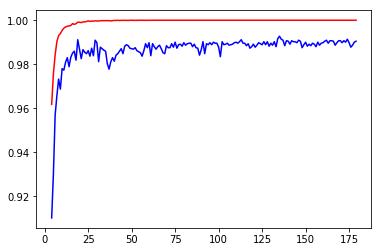

EPOCH 181 ...
Train Accuracy = 1.000
Validation Accuracy = 0.992
Learning rate = 0.00008


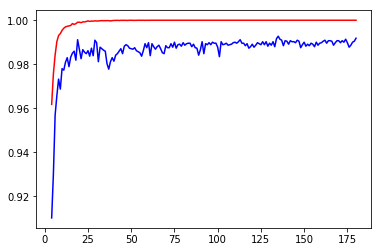

EPOCH 182 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00008


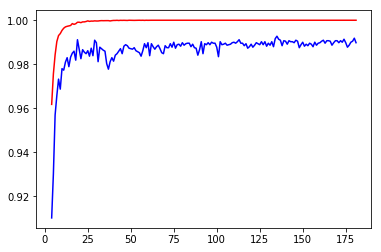

EPOCH 183 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00008


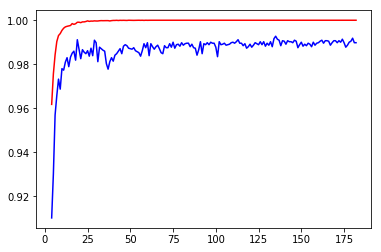

EPOCH 184 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00008


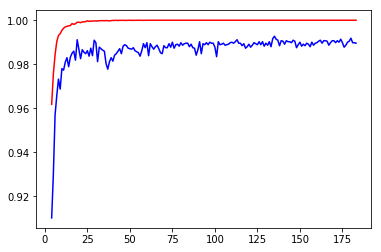

EPOCH 185 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00008


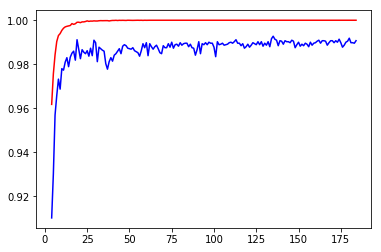

EPOCH 186 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


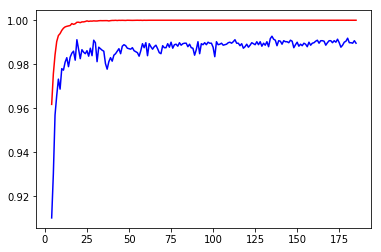

EPOCH 187 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


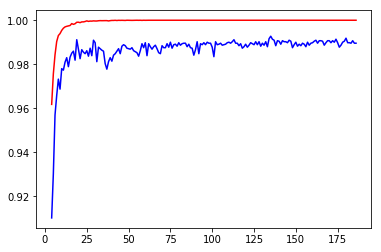

EPOCH 188 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


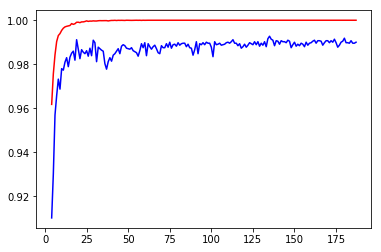

EPOCH 189 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


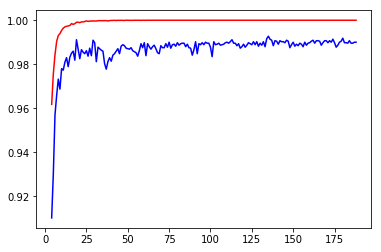

EPOCH 190 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


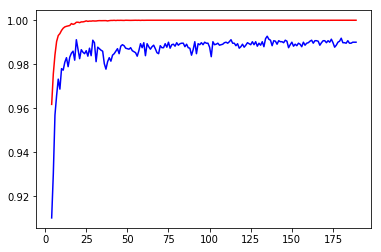

EPOCH 191 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00007


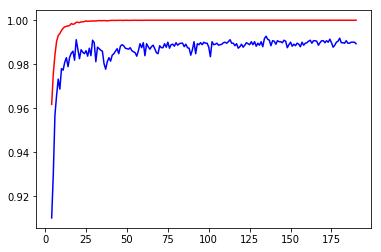

EPOCH 192 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00007


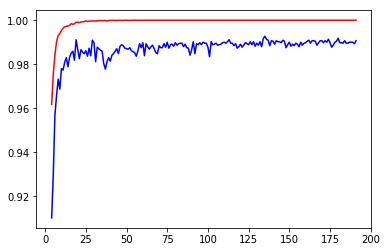

EPOCH 193 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


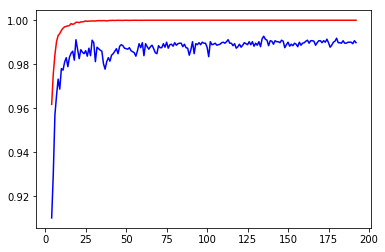

EPOCH 194 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00007


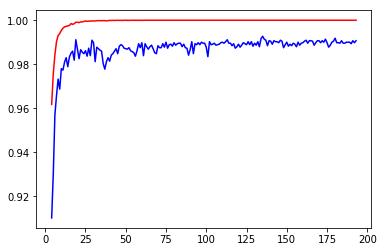

EPOCH 195 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


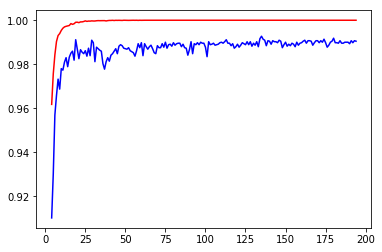

EPOCH 196 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00007


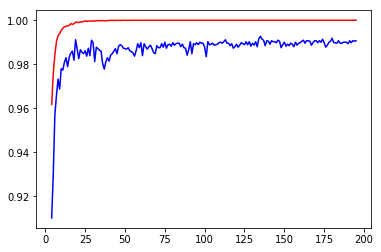

EPOCH 197 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


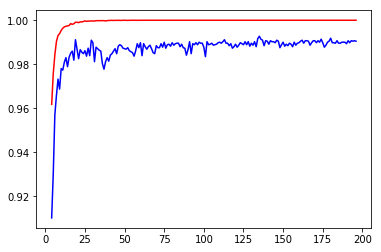

EPOCH 198 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


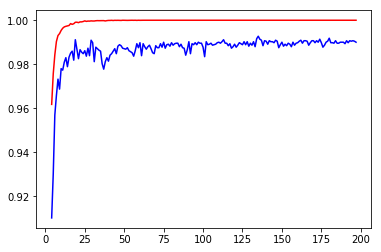

EPOCH 199 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00007


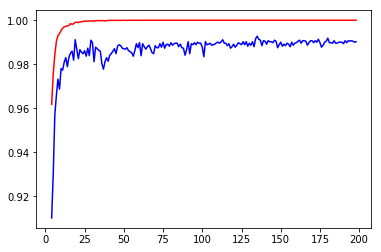

EPOCH 200 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


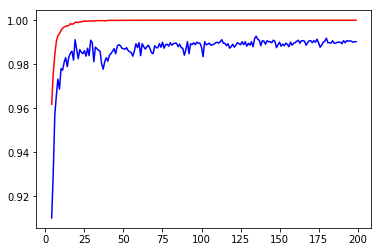

EPOCH 201 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


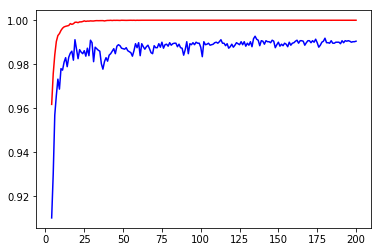

EPOCH 202 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


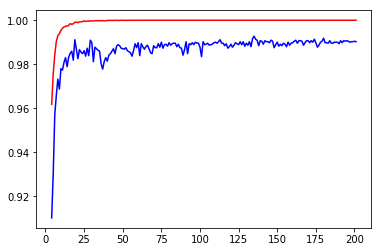

EPOCH 203 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00006


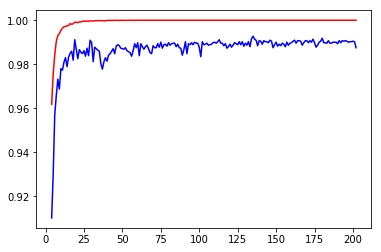

EPOCH 204 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


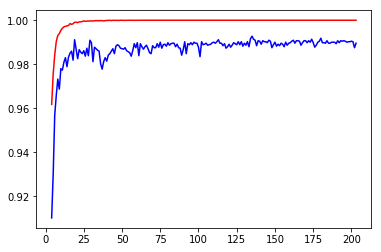

EPOCH 205 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


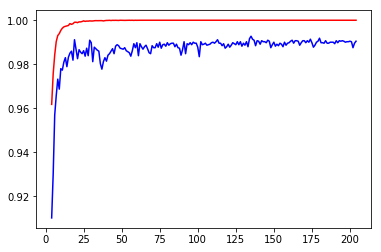

EPOCH 206 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


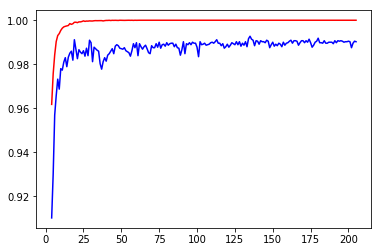

EPOCH 207 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


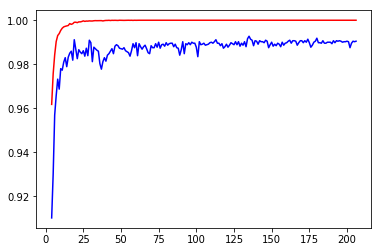

EPOCH 208 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


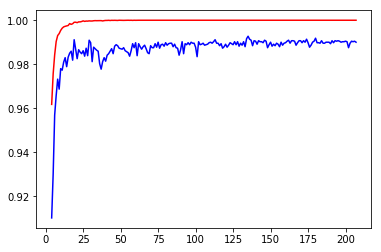

EPOCH 209 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00006


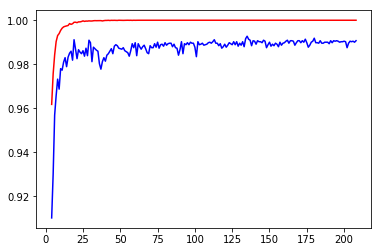

EPOCH 210 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


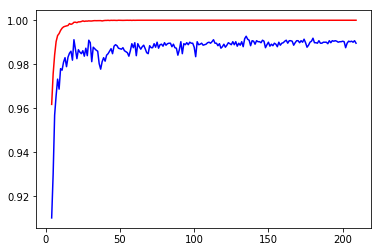

EPOCH 211 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00006


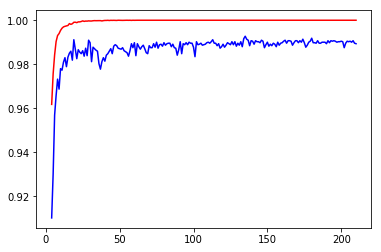

EPOCH 212 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


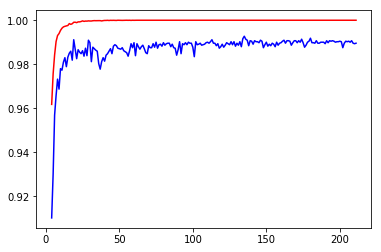

EPOCH 213 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00006


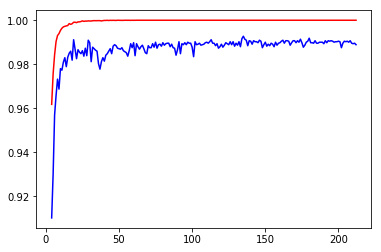

EPOCH 214 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


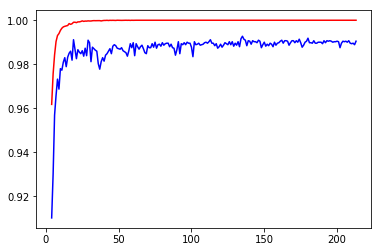

EPOCH 215 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


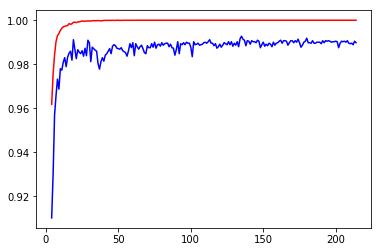

EPOCH 216 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00006


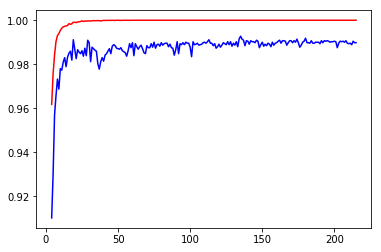

EPOCH 217 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


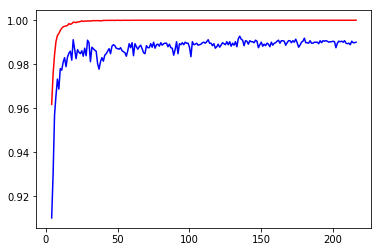

EPOCH 218 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00005


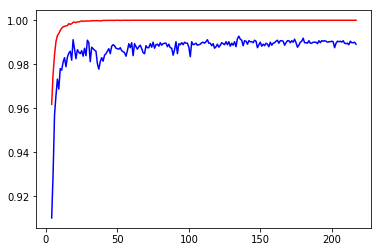

EPOCH 219 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


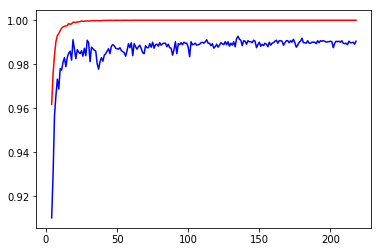

EPOCH 220 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


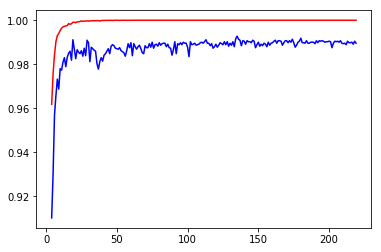

EPOCH 221 ...
Train Accuracy = 1.000
Validation Accuracy = 0.987
Learning rate = 0.00005


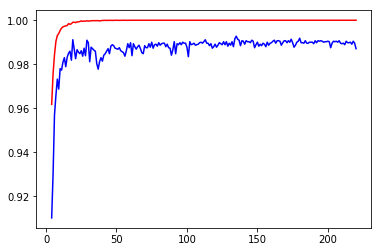

EPOCH 222 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00005


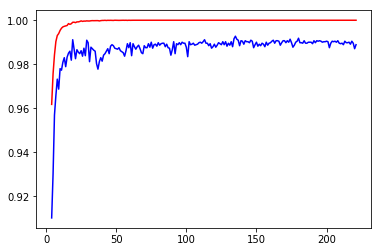

EPOCH 223 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


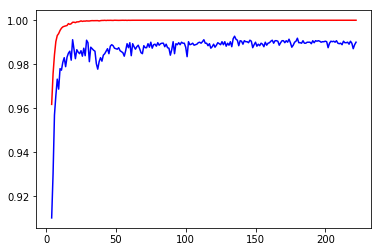

EPOCH 224 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


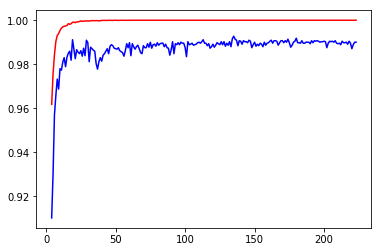

EPOCH 225 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00005


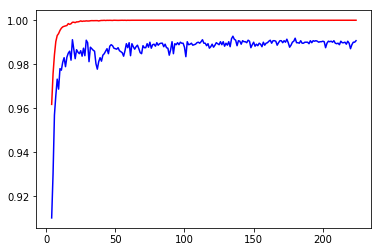

EPOCH 226 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


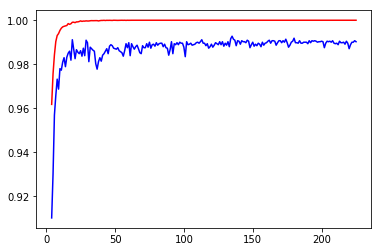

EPOCH 227 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00005


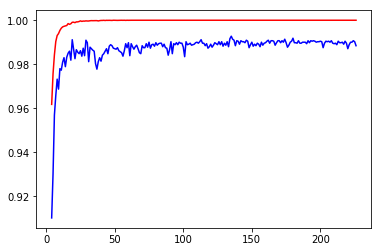

EPOCH 228 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


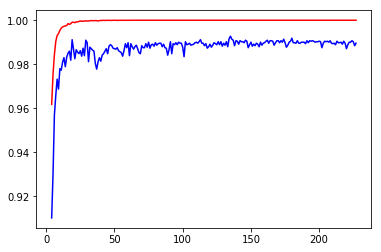

EPOCH 229 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00005


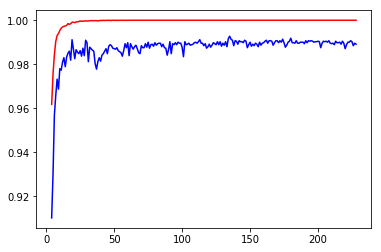

EPOCH 230 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


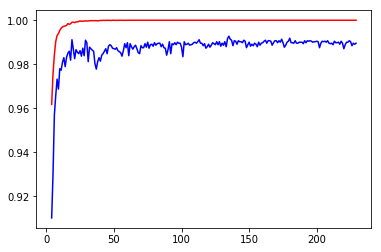

EPOCH 231 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00005


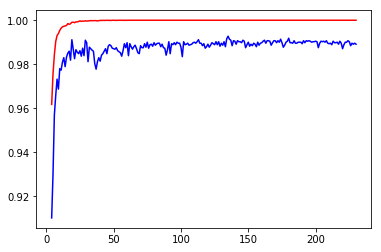

EPOCH 232 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


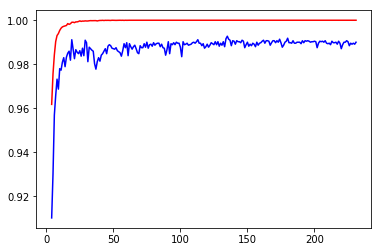

EPOCH 233 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


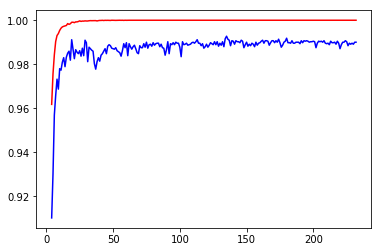

EPOCH 234 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


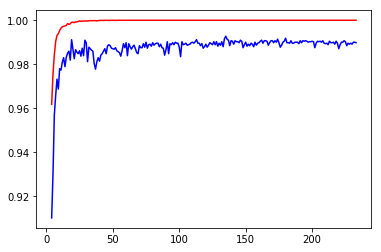

EPOCH 235 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00005


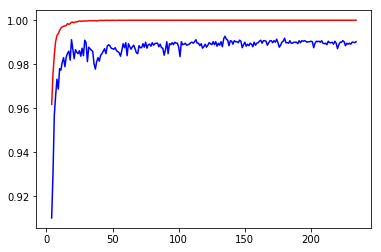

EPOCH 236 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00004


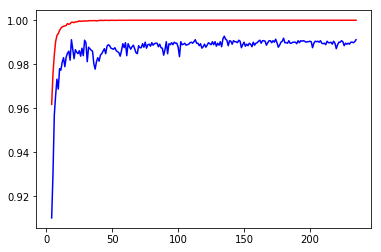

EPOCH 237 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00004


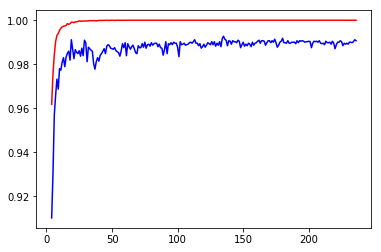

EPOCH 238 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00004


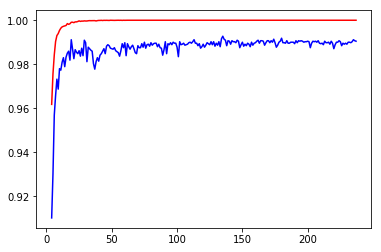

EPOCH 239 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00004


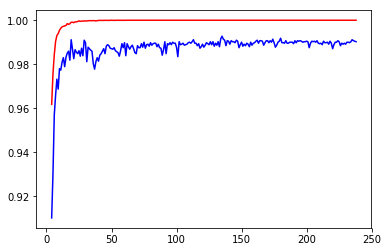

EPOCH 240 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00004


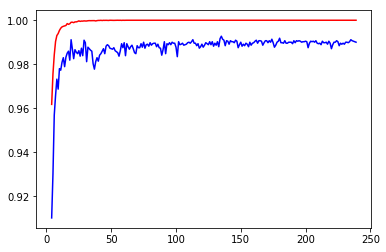

EPOCH 241 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00004


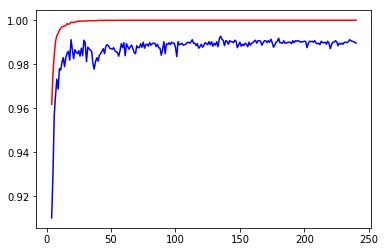

EPOCH 242 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00004


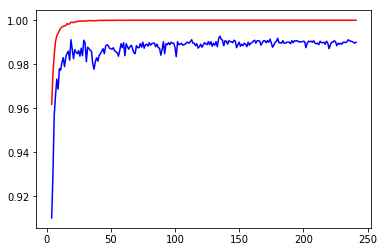

EPOCH 243 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00004


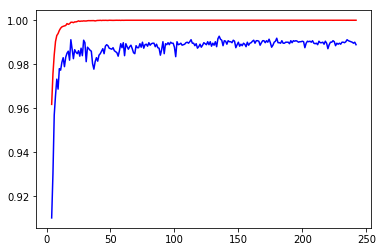

EPOCH 244 ...
Train Accuracy = 1.000
Validation Accuracy = 0.988
Learning rate = 0.00004


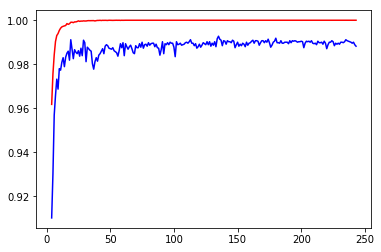

EPOCH 245 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00004


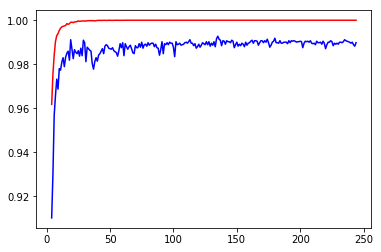

EPOCH 246 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00004


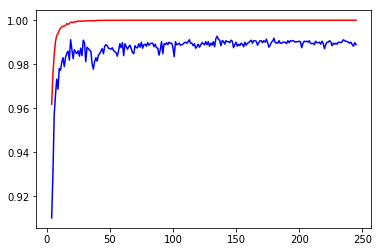

EPOCH 247 ...
Train Accuracy = 1.000
Validation Accuracy = 0.989
Learning rate = 0.00004


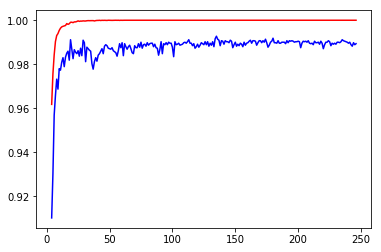

EPOCH 248 ...
Train Accuracy = 1.000
Validation Accuracy = 0.991
Learning rate = 0.00004


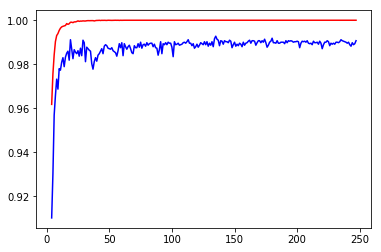

EPOCH 249 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00004


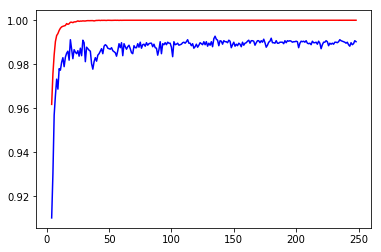

EPOCH 250 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Learning rate = 0.00004


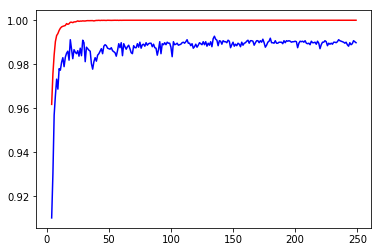

Model saved


In [16]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess,'./lenet')
    num_examples = len(X_trainp)
    
    print("Training...")
    print()
    
    history = {'validation_accuracy': [], 'train_accuracy': []}
    
    for i in range(250):
        X_trainp, y_train = shuffle(X_trainp, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = img_augmentation(X_trainp[offset:end], rot_range=15.), y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,
                                                    keep_prob: kpv,
                                                    global_step: i})
            
        validation_accuracy = evaluate(X_validp, y_valid)
        train_accuracy = evaluate(X_trainp, y_train)
        
        history['validation_accuracy'].append(validation_accuracy)
        history['train_accuracy'].append(train_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))        
        print("Learning rate = {:.5f}".format(sess.run(learning_rate, feed_dict={x: batch_x, y: batch_y,
                                                    keep_prob: kpv,
                                                    global_step: i})))
        
        if i > 5:
            x_axis = [x for x in range(4, len(history['validation_accuracy']))]
            fig = plt.subplot()
            fig.plot(x_axis, history['validation_accuracy'][4:], 'b', x_axis, history['train_accuracy'][4:], 'r')
            plt.show()
        
        #print()
        
    saver.save(sess, './TwoStage2')
    print("Model saved")

In [22]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess,'./TwoStage2')
    num_examples = len(X_trainp)
    validation_accuracy = evaluate(X_validp, y_valid)
    train_accuracy = evaluate(X_trainp, y_train)
    test_accuracy = evaluate(X_testp, y_test)
        
    print("EPOCH {} ...".format(i+1))
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))        
    print("Test Accuracy = {:.3f}".format(test_accuracy))        
    print("Learning rate = {:.5f}".format(sess.run(learning_rate, feed_dict={x: batch_x, y: batch_y,
                                                keep_prob: kpv,
                                                global_step: i})))
        


INFO:tensorflow:Restoring parameters from ./TwoStage2
EPOCH 250 ...
Train Accuracy = 1.000
Validation Accuracy = 0.990
Test Accuracy = 0.987
Learning rate = 0.00004


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")